<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/Doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
from matplotlib import image

In [2]:
#Tải tập dữ liệu
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#có 50000 hình ảnh đào tạo và 1000 hình ảnh thử nghiệm

In [4]:
y_train.shape
#Có 50000 giá trị tương ứng với 50000 tấm ảnh train

(50000, 1)

In [6]:
#y_train là một mảng 2D ,vì việc phân loại mảng 1D đủ tốt nên chúng ta chuyển đổi về mảng 1D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
#vẽ một số hình ảnh để xem chúng là gì
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

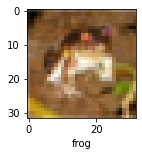

In [10]:
plot_sample(X_train, y_train, 0)

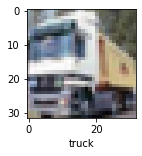

In [11]:
plot_sample(X_train, y_train, 1)

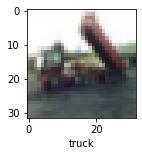

In [23]:
plot_sample(X_train, y_train, 2)

In [12]:
#Chuẩn hóa hình ảnh thành một số từ 0 đến 1. Hình ảnh có 3 kênh (R, G, B) và mỗi giá trị trong kênh có thể nằm trong khoảng từ 0 đến 255.
#Do đó để chuẩn hóa trong phạm vi 0 -> 1, chúng ta cần chia nó bằng 255
#Chuẩn hóa dữ liệu đào tạo
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
#Xây dựng mạng nơron nhân tạo đơn giản để phân loại hình ảnh
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.8113 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6236 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5424 - accuracy: 0.4536
Epoch 4/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4844 - accuracy: 0.4753
Epoch 5/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.4334 - accuracy: 0.4944


In [16]:
#Xây dựng một mạng nơ-ron phức hợp để đào tạo hình ảnh
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.4273 - accuracy: 0.8468 - val_loss: 1.5453 - val_accuracy: 0.6727
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.3010 - accuracy: 0.8901 - val_loss: 1.5391 - val_accuracy: 0.6720
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.2863 - accuracy: 0.8948 - val_loss: 1.5838 - val_accuracy: 0.6757
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2738 - accuracy: 0.8998 - val_loss: 1.5911 - val_accuracy: 0.6749
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2562 - accuracy: 0.9068 - val_loss: 1.6564 - val_accuracy: 0.6729
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.2565 - accuracy: 0.9066 - val_loss: 1.7020 - val_accuracy: 0.6745
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2385 - accuracy: 0.9134 - val_loss: 1.7379 -

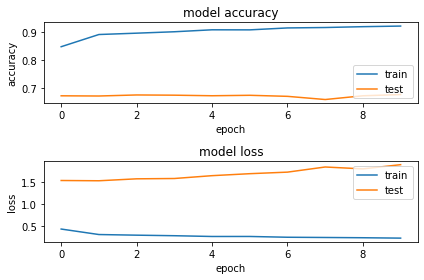

In [30]:
# Đánh giá mô hình
history = cnn.fit(X_train,y_train, epochs=10,
                    validation_data=(X_test, y_test))
fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')

plt.subplot (2,1,2)
plt.plot(history.history ['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()

In [33]:
#Với CNN, vào cuối 5 epochs,độ chính xác ở mức khoảng 70%
#CNN phân loại hình ảnh và tính toán ít hơn so với ANN
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.9096 - accuracy: 0.6771


[1.909619688987732, 0.6771000027656555]

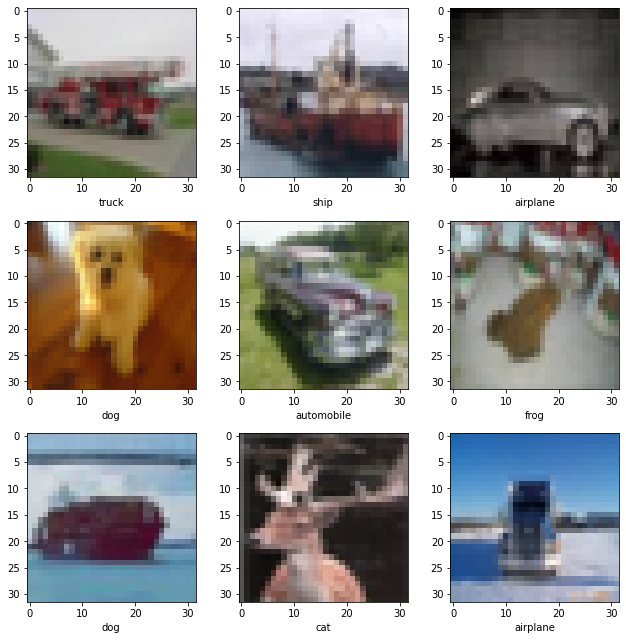

In [31]:
# Hiển thị ngẫu nhiên 9 tấm hình trong tập test và dự đoán
#Để chọn ngẫu nhiên các tấm ảnh 
import random
import os
predicted_classes=cnn.predict(X_test)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(X_test))
  plt.imshow(X_test[num])
  y_classes = [np.argmax(element) for element in predicted_classes]
  plt.xlabel(classes[y_classes[num]])
plt.tight_layout()


In [59]:
def load_image(filename):
  import numpy as np
  from PIL import Image
  # load tấm ảnh lên
  global label_packed
  image = Image.open(filename)
  image = image.resize((32,32))
  image = np.expand_dims(image, axis = 0)
  image = np.array(image)
  img=image.astype('float32')
  img=img/255.0
  return img
img_test = load_image("cat.jpg")
ob = cnn.predict(img_test)
print('Đây là: ',classes[np.argmax(ob)])

FileNotFoundError: ignored